# Opis ELO ocen v šahu

ELO ocena temelji, na predpostavki, da je šahovska uspešnost pri posamezni igri slučajna spremenljivka, ki je porazdeljena normalno.
Recimo, da imamo igralca A in B z ELO ocenama $R_A$ in $R_B$, potem je pričakovana vrednost za zmago igralca:
\begin{align}
E_A = \frac{1}{1 + 10^{\frac{R_B - R_A}{400}}} \, \quad && \quad \, E_B = \frac{1}{1 + 10^{\frac{R_A - R_B}{400}}}
\end{align}

Igralec, ki zmaga dobi točke igralec, ki pa izgubi igro izgubi točke.
Večja kot je razlika $|R_A - R_B|$, več točk dobi igralec, ki je zmagal in ima manjšo oceno, več jih izgubi igralec, ki je izgubil in ima višjo oceno. To izračunamo po formulah:
\begin{align}
R^{'}_A = R_A + K(S_A - E_A) \, \quad && \quad \, R^{'}_B = R_B + K(S_A - E_B),
\end{align}

kjer je $S_{A/B} \in \{1, \frac{1}{2}, 0\}$ (zmaga, izenači, izgubi) in $K = 16$ (za šibkejše igralce se ponavadi vzame $K = 32$). 

Primer:
- A ima oceno 2600
- B ima oceno 2300 .

Potem sta:
- E_A = $\frac{1}{1 + 10^{\frac{2300 - 2600}{400}}} = 0.849$
- E_B = $\frac{1}{1 + 10^{\frac{2600 - 2300}{400}}} = 0.151$ 

Če zmaga A, sta novi oceni, torej $S_A$ = 1 in $S_B$ = 0:
- $R^{'}_A = 2600 + 16(1 - 0.849) = 2602$
- $R^{'}_B = 2300 + 16(0 - 0.151) = 2298$

Če izenačita, torej S_A = S_B = \frac{1}{2}:
- $R^{'}_A = 2600 + 16(0.5 - 0.849) = 2594$
- $R^{'}_B = 2300 + 16(0.5 - 0.151) = 2306$ 

Če zmaga B, torej $S_B$ = 1 in $S_A$ = 0:
- $R^{'}_A = 2600 + 16(0 - 0.849) = 2586$
- $R^{'}_B = 2300 + 16(1 - 0.151) = 2314$

# Vrste iger

Obravnavali bomo classical, rapid in blitz(vsaka ima tudi več podvrst, omejil se bom le na glavne). Oznaka $a | b$ pomeni $a$ minut z $b$ sekund dodatka za vsako potezo.
- Classical: $90|30$ za prvih $40$ potez, potem dobita igralca dodatnih $30$ min
- Rapid: $15|10$
- Blitz: $3|2$

In [670]:
import pandas
import matplotlib.pyplot as plt
import statistics
import random

sahisti = pandas.read_csv("Podatki_sahistov.csv")
programi = pandas.read_csv("Podatki_programov.csv")
populacije = pandas.read_csv("Populacija drzav od leta 1950 do 2020.csv")

sahisti

,Ime,Država,Naziv,Classical ocena,Rapid ocena,Blitz ocena,Leto rojstva,Število iger
0,"Haidary, Hameedullah",AFG,,2192,0,0,1975.0,19
1,"Sharify, Aziz",AFG,FM,2173,0,0,1990.0,34
2,"Farazi, Khaiber",AFG,CM,2128,2136,2159,1984.0,97
3,"Fidaeyee, Habibullah",AFG,CM,2101,0,0,1978.0,31
4,"Hedayat, Suliman",AFG,,2093,0,0,NaN,15
...,...,...,...,...,...,...,...,...
74395,"Chinounda, Edmund",ZIM,,0,0,0,2004.0,0
74396,"CHINYAMA, KUDZAI",ZIM,,0,0,0,1990.0,0
74397,Chinyanga Dylan Adreyn,ZIM,,0,0,0,1998.0,0
74398,CHINZOU KUDZAI,ZIM,,0,0,0,2005.0,0


In [671]:
programi

,Ime,ELO,Leto izdaje,Zadnja različica,Igre
0,Stockfish,3936,2021.0,2008.0,129221
1,Alliestein,3936,2020.0,2019.0,358
2,Komodo,3912,2021.0,2010.0,74295
3,Rybka,3900,2011.0,2005.0,80628
4,Houdini,3854,2017.0,2010.0,66443
...,...,...,...,...,...
529,Fornax,0,NaN,NaN,30
530,Odonata,0,NaN,NaN,27
531,Admete,0,NaN,NaN,26
532,Anka,0,NaN,NaN,25


In [672]:
nazivi = sahisti[sahisti != " "].dropna()
nazivi

,Ime,Država,Naziv,Classical ocena,Rapid ocena,Blitz ocena,Leto rojstva,Število iger
1,"Sharify, Aziz",AFG,FM,2173,0,0,1990.0,34
2,"Farazi, Khaiber",AFG,CM,2128,2136,2159,1984.0,97
3,"Fidaeyee, Habibullah",AFG,CM,2101,0,0,1978.0,31
5,"Amini, Habibullah",AFG,CM,2062,2024,2034,1981.0,68
6,"Mirzaad, S.wahabuddin",AFG,FM,2032,2054,1932,1987.0,48
...,...,...,...,...,...,...,...,...
73962,"Ncube, Sifiso",ZIM,FM,1907,1876,1942,1998.0,25
73987,"Mamombe, Kudzanai",ZIM,IM,1849,0,2002,1971.0,137
74028,"Charinda, Kudzanayi",ZIM,WCM,1758,1719,1735,1994.0,88
74099,"Mudodo, Refiloe Hazel",ZIM,WCM,1651,0,0,2005.0,126


# 1. Hipoteza

Poskušali bomo ugotoviti, če države z višjo populacijo proizvedejo več šahistov z višjo oceno(classical, rapid in blitz) in tudi višjim nazivom. Ocene, ki jih bomo gledali bodo temeljile glede na naslov(primer: katera država ima največ GM-ov oz. šihistov z oceno > 2500).

# Nazivi

FIDE oz. Internation Chess Federation je glavna ustanova za organizacjo mednarodnih šahovskih tekmovanj. Kot taka ima svoje nazive, ki jih šahist pridobi, če zadošča pravim pogojem.
Imamo dve vrsti naslovov: odprte(Open) in ženske(Women). Odprti naslov lahko dobi kdor koli, med tem ko je ženski naslov lahko dobimo samo ženske. Naslovi:
- Women Candidate Master(WCM), ELO: $2000$ 
- Women Fide Master(WFM), ELO: $2100$
- Candidate Master(CM), ELO: $2200$
- Women International Master(WIM), ELO: $2200$
- FIDE Master(FM), ELO: $2300$
- Women Grandmaster(WGM), ELO: $2300$
- International Master(IM), ELO: $2400$
- Grandmaster(GM), ELO: $2500$

Obstaja še ne uraden naziv Super Grandmaster(SGM), kjer je ELO ocena vsaj $2700$.


Opomba: ELO, na katerega se navizuje naslov, je minimalena classical ocena, ki jo mora kandidat dobiti, ni pa edini pogoj(samo na tega se bomo osredotočili). Ko enkrat naslov osvojiš, ga obdržiš za vedno(tudi, če ne izpolnjuješ pogojem za pridobitev tega naslova).

In [673]:
from Zajem import poberi_drzave

drzave = poberi_drzave()
classical = sahisti[["Ime", "Država", "Naziv", "Classical ocena"]]

veljavne_GM = classical[classical["Classical ocena"] >= 2500]
veljavne_GM

,Ime,Država,Naziv,Classical ocena
270,"Dervishi, Erald",ALB,GM,2526
1270,"Henderson de La Fuente, Lance",AND,GM,2505
1977,"Pichot, Alan",ARG,GM,2629
1978,"Mareco, Sandro",ARG,GM,2618
1979,"Peralta, Fernando",ARG,GM,2585
...,...,...,...,...
71408,"Kayumov, Sergey",UZB,GM,2505
71900,"Le, Quang Liem",VIE,GM,2728
71901,"Nguyen, Ngoc Truong Son",VIE,GM,2645
71902,"Le, Tuan Minh",VIE,IM,2542


In [674]:
num_of_GM = veljavne_GM.groupby("Država").size().sort_values(ascending=False).head(40)
num_of_GM

Država
RUS    134
USA     68
UKR     57
GER     42
IND     40
CHN     37
HUN     30
POL     29
NED     28
FRA     26
ARM     21
ISR     21
AZE     19
ENG     17
GEO     17
CZE     14
CRO     14
ARG     14
SRB     13
ITA     12
ROU     11
BRA     11
CUB     10
DEN     10
GRE     10
UZB      9
NOR      9
SWE      9
BUL      8
TUR      8
LTU      7
IRI      7
AUS      7
LAT      6
KAZ      6
CAN      6
BLR      6
SUI      6
SVK      6
PER      6
dtype: int64

<AxesSubplot:xlabel='Država'>

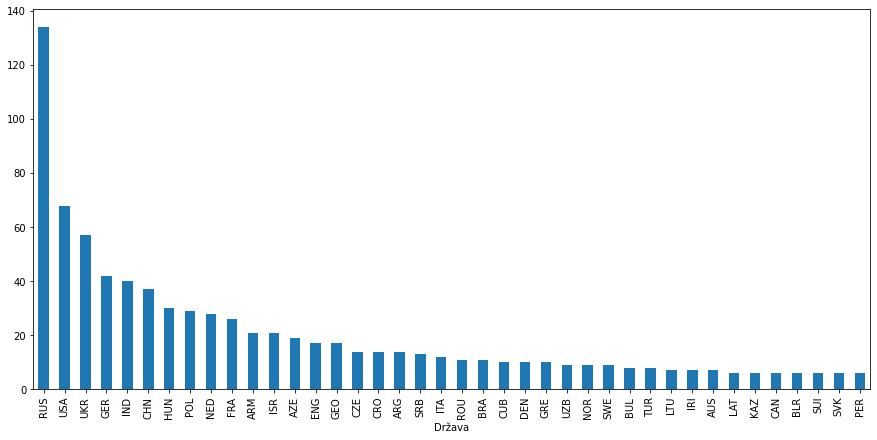

In [675]:
num_of_GM.plot.bar(x = "Država", figsize = (15, 7))

<AxesSubplot:xlabel='Country'>

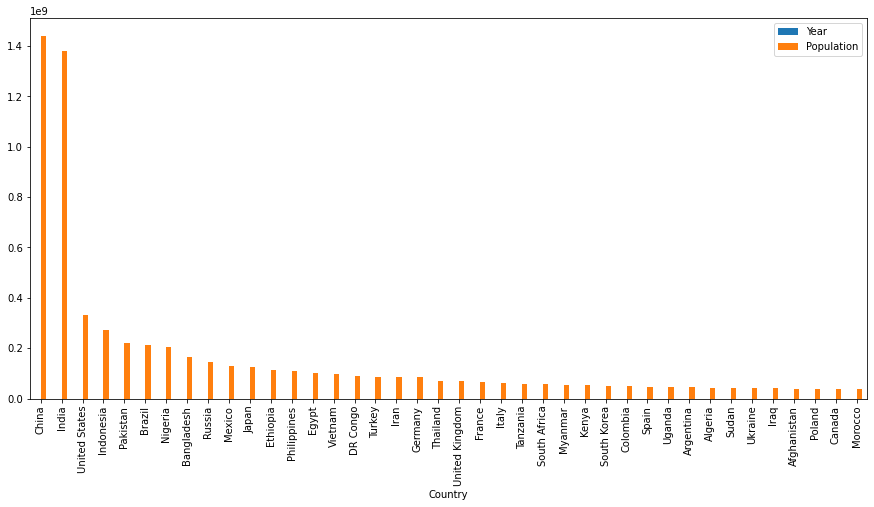

In [676]:
pom = populacije[["Country" ,"Year", "Population"]]
populacije_2020 = pom[pom["Year"] == 2020].head(40)
populacije_2020.plot.bar(x = "Country", figsize = (15, 7))

Vidimo, da je ima izmed 40 držav z najboljšimi šahisti, 14 od teh med top 40 v populaciji.

# 2. Hipoteza

Poskusimo pokazati, da je v povprečju vsaka sledeča generacija boljša od prejšnje.

In [677]:
vrhunec = sahisti[["Ime","Država", "Classical ocena", "Leto rojstva"]].dropna()
# Obravnavali bomo le šahiste, ki imajo Classical oceno večjo od 0
veljavni_c = vrhunec[vrhunec["Classical ocena"] > 0].sort_values("Leto rojstva", ascending=True)
veljavni_c

,Ime,Država,Classical ocena,Leto rojstva
27418,"Toth G., Geza",HUN,2255,1921.0
4084,"Barczyszyn, Karl",AUT,2128,1921.0
10053,"Jankov, Todor",BUL,2293,1922.0
3772,"Nowotny, Heinz",AUT,2255,1923.0
52519,"Lipiniks, Leonardo",PAR,1704,1924.0
...,...,...,...,...
55387,Khaled AlJamaat,QAT,1181,2015.0
59148,Ashwath Kaushik,SGP,1334,2015.0
39371,"Esmer, Hamza",LUX,1063,2015.0
15258,"Skouroupathis, Kyriakos",CYP,1142,2015.0


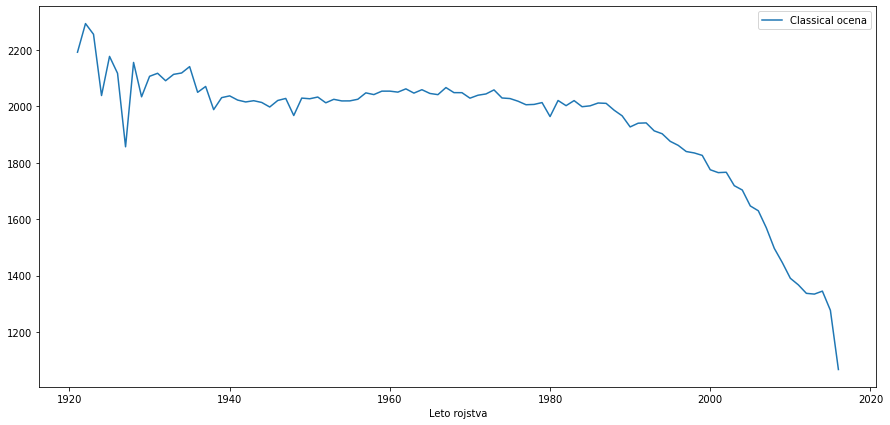

In [678]:
m = int(min(veljavni_c["Leto rojstva"]))
M = int(max(veljavni_c["Leto rojstva"]))

stevilo_igralcev_na_leto = veljavni_c.groupby(["Leto rojstva"]).count()
povprecja_po_letih = veljavni_c.groupby(["Leto rojstva"]).mean()
povprecja_po_letih["Classical ocena"].plot(legend=True, figsize=(15,7))

plt.show()

#povprecja_po_letih["Classical ocena"]


In [679]:
from cmath import sqrt
from statistics import mean, pstdev, stdev

#z = 1.96

def povprecje_za(leto):
   podatki_za_leto = veljavni_c[veljavni_c["Leto rojstva"] == leto]
   sez_ocen = list(podatki_za_leto["Classical ocena"])
   return mean(sez_ocen)

def std_za(leto):
   podatki_za_leto = veljavni_c[veljavni_c["Leto rojstva"] == leto]
   sez_ocen = list(podatki_za_leto["Classical ocena"])
   return pstdev(sez_ocen)

def se_za(leto):
   podatki_za_leto = veljavni_c[veljavni_c["Leto rojstva"] == leto]
   sez_ocen = list(podatki_za_leto["Classical ocena"])
   n = len(sez_ocen)
   return pstdev(sez_ocen)/sqrt(n)

#def int_zaupanja(leto):
#   return se_za(leto)*z

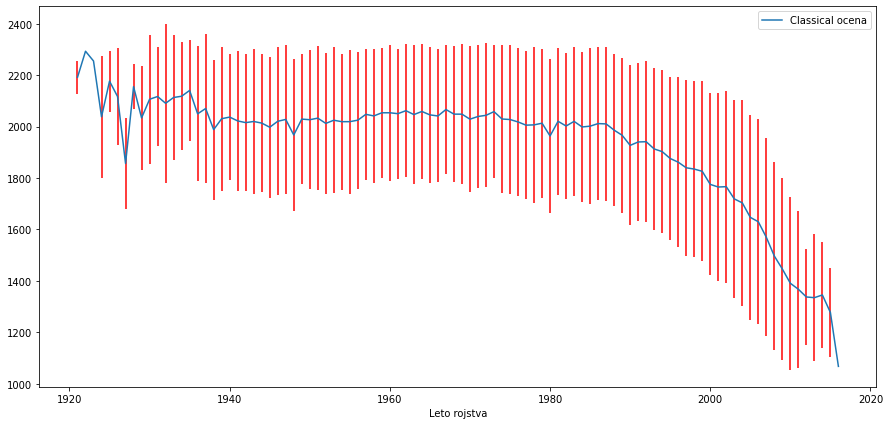

In [680]:
povprecja_po_letih["Classical ocena"].plot(legend=True, figsize=(15,7))

for leto in range(m, M):
    plt.vlines(leto, ymin=(povprecje_za(leto) - std_za(leto)), ymax=(povprecje_za(leto) + std_za(leto)), colors="red")

plt.show()

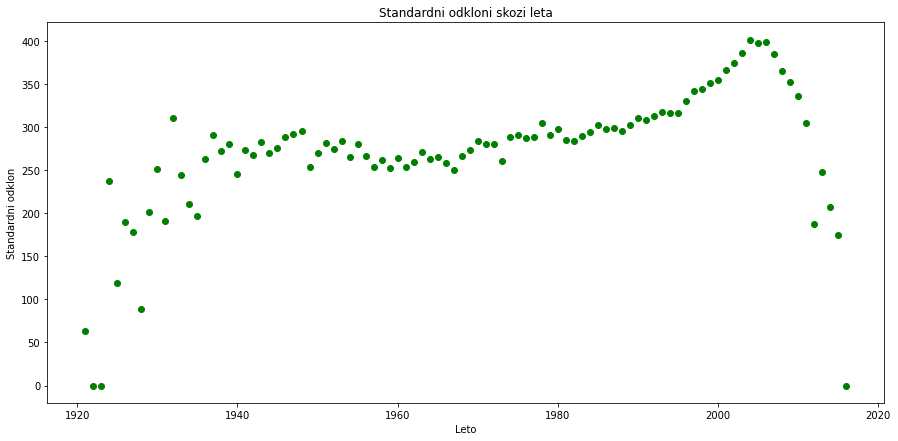

In [681]:
from cProfile import label
from turtle import color


sez_std = [std_za(leto) for leto in range(m,M+1)]
leta = [i for i in range(m, M+1)]

plt.figure(figsize=(15,7))
std_plot = plt.scatter(leta, sez_std, color="green")
plt.xlabel("Leto")
plt.ylabel("Standardni odklon")
plt.title("Standardni odkloni skozi leta")

plt.show()


<AxesSubplot:xlabel='Leto rojstva'>

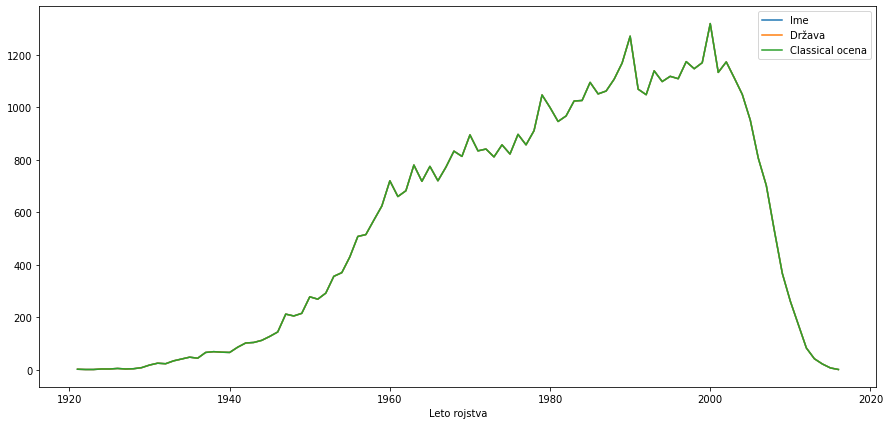

In [682]:
stevilo_igralcev_na_leto.plot(figsize=(15,7))

Kot vidimo z zgornjega grafa, število šahistov z leti narašča, čeprav imamo desno od grafa strog padec(kar je smiselno, saj so to igralci stari 15 ali manj let). Zato je smiselno, da določena leta izpustimo, saj je premalo dokumentiranih šahistov za smiselno analizo, zato poglejmo kako izgledajo grafi, če izpustimo leta s premalo igralci(tj. leta z manj kot 100 igralci).

In [683]:
def sez_novih_veljavnih():
    stevila_po_drzavah = {}
    sez_drzav = list(veljavni_c["Leto rojstva"])
    for i in sez_drzav:
        if stevila_po_drzavah.get(i) == None:
            stevila_po_drzavah[i] = 1
        else:
            stevila_po_drzavah[i] += 1

    return {k: v for (k,v) in stevila_po_drzavah.items() if v >= 100 }.keys()

veljavni_100 = veljavni_c[veljavni_c["Leto rojstva"].isin(sez_novih_veljavnih())]

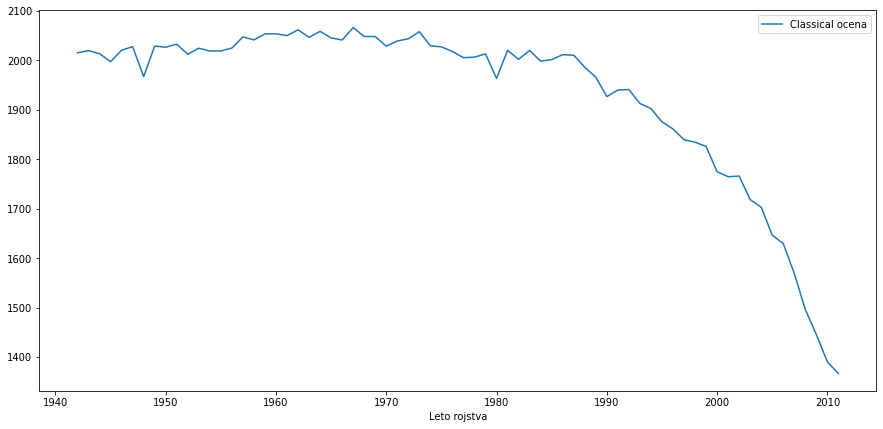

In [684]:
povprecja_po_letih_100 = veljavni_100.groupby(["Leto rojstva"]).mean()
povprecja_po_letih_100["Classical ocena"].plot(legend=True, figsize=(15,7))

plt.show()

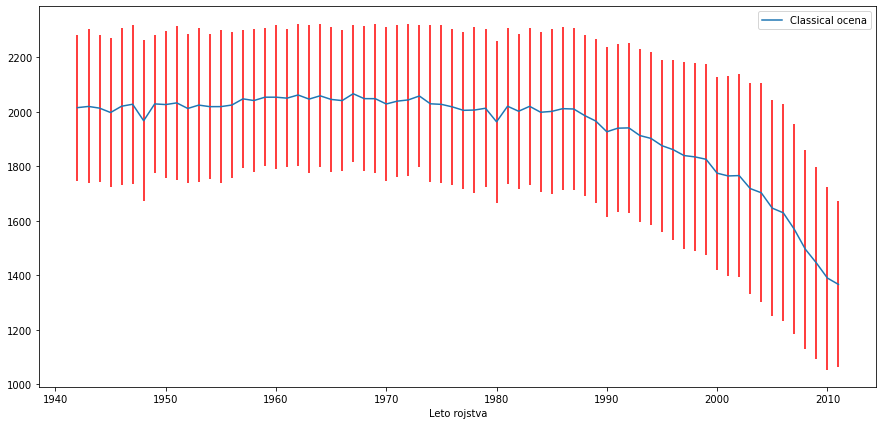

In [685]:
povprecja_po_letih_100["Classical ocena"].plot(legend=True, figsize=(15,7))

for leto in sez_novih_veljavnih():
    plt.vlines(leto, ymin=(povprecje_za(leto) - std_za(leto)), ymax=(povprecje_za(leto) + std_za(leto)), colors="red")

plt.show()

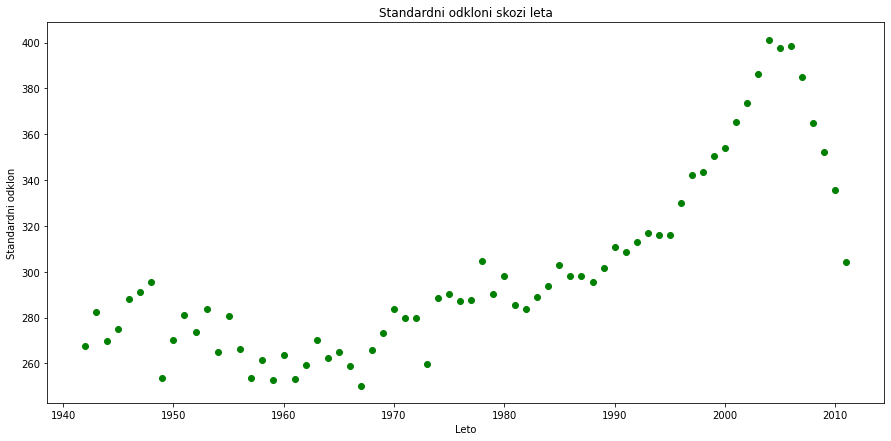

In [686]:
sez_std_100 = [std_za(leto) for leto in sez_novih_veljavnih()]

plt.figure(figsize=(15,7))
std_plot = plt.scatter(sez_novih_veljavnih(), sez_std_100, label="a", color="green")
plt.xlabel("Leto")
plt.ylabel("Standardni odklon")
plt.title("Standardni odkloni skozi leta")

plt.show()

<AxesSubplot:xlabel='Leto rojstva'>

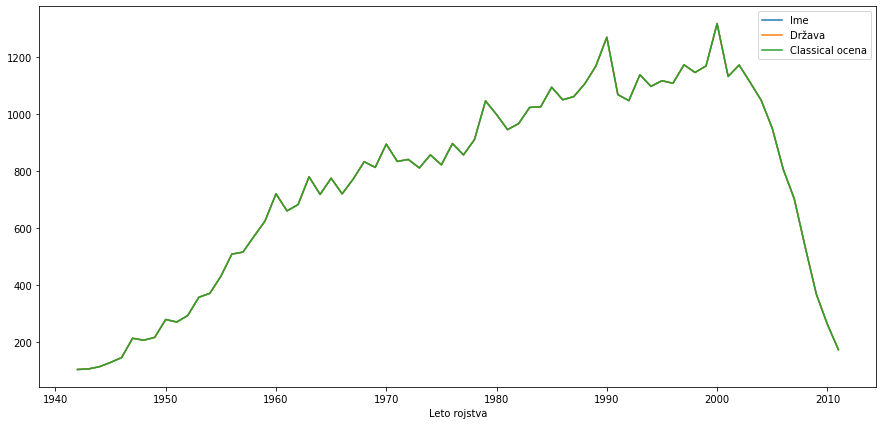

In [687]:
stevilo_igralcev_na_leto_100= veljavni_100.groupby(["Leto rojstva"]).count()
stevilo_igralcev_na_leto_100.plot(figsize=(15,7), label="Število igralcev za določeno leto")


Kar lahko iz grafov sklepamo je sledeče:
povprečna ocena z leti pada, kar bi nam dalo misliti, da z leti kvaliteta igralcov pada, vendar pa moramo upoštevati še dva podatka, to sta število igralcev vsako leto in standardni odklon od povprečja. Ker je število igralcev vsako leto več, kar je tudi več povprečnih igralcev, kar zmanšuje povprečje(včasih je bilo manj profesoional šahistov, vendar so bili v povprečju boljši). Vidimo pa, da se standardni odklon z leti tudi veča, tako da imamo tudi igralce, ki so precej bolši od povprečja, torej imam vsako leto več boljših igralcev vendar tudi več slabših, teh slabiš pa je toliko več, da znižujejo povprečje.

# 3. Hipoteza

Pri tej hipotezi bomo poskušali ugotoviti, če bo kdorkoli v tem stoletju presegel classical ELO oceno 2900. Ogledali si bomo dovolj veliko število najbolših igralcev na svetu in poskušali napovedati, katerega leta bo tak igralec rojen. Ker je Super velemojstrov bolj malo(39) bomo naredili za analizo za vse velemojstre 2500(GM).



In [688]:
def stevilo_igralcev_z_oceno_vsaj(n):
    return vrhunec[vrhunec["Classical ocena"] >= n].sort_values("Leto rojstva", ascending=True), len(vrhunec[vrhunec["Classical ocena"] >= n])

stevilo_igralcev_z_oceno_vsaj(2700)

(                              Ime Država  Classical ocena  Leto rojstva
 55991            Kasparov, Garry     RUS             2812        1963.0
 28133         Anand, Viswanathan     IND             2756        1969.0
 9937            Topalov, Veselin     BUL             2728        1975.0
 55993          Kramnik, Vladimir     RUS             2753        1975.0
 70330             Aronian, Levon     USA             2755        1982.0
 2477         Sargissian, Gabriel     ARM             2711        1983.0
 70331   Dominguez Perez, Leinier     USA             2747        1983.0
 55995        Grischuk, Alexander     RUS             2745        1983.0
 4127      Mamedyarov, Shakhriyar     AZE             2747        1985.0
 28136       Harikrishna, Pentala     IND             2717        1986.0
 4128           Radjabov, Teimour     AZE             2747        1987.0
 70328           Nakamura, Hikaru     USA             2768        1987.0
 12082                  Wang, Hao     CHN          

In [689]:
from scipy import stats
from sympy import symbols, solve

def linearna_regresija(podatki):
    x = podatki["Leto rojstva"]
    y = podatki["Classical ocena"]


    k, zac, r, p, std = stats.linregress(x,y)
    def reg_premica(x):
        return k*x + zac

    graf_p = list(map(reg_premica, x))

    #plt.figure(figsize=(15,7))
    #plt.plot(x,graf_p)
    #plt.scatter(x, y)
    #plt.show()

    return k, zac

k, zac = linearna_regresija(stevilo_igralcev_z_oceno_vsaj(2500)[0])

print(k)


def presek_premice_z(k,zac,n):
    X = symbols("X")
    izraz = k*X + zac - n
    sol = solve(izraz)
    return sol

print(presek_premice_z(k, zac, 2900))

0.6368837578547687
[2502.73192618408]


Za bolj natancno analizo poglejmo se naklone 200 slucajnih vzorcev velikosti 100, ter izracunajmo njihovo povprecje in standarni odklon.

In [690]:
import random

sez_naklonov = []
for i in range(200):
    vzorec = stevilo_igralcev_z_oceno_vsaj(2500)[0].sample(n=100)
    sez_naklonov.append(linearna_regresija(vzorec)[0])

mean_k = mean(sez_naklonov)
std_k = pstdev(sez_naklonov)


Racunali bomo kdaj regresijska premica doseže vrednost $2900$ za tri različne naklone. Prvi je zracunan za vse sahiste z ELO Classical oceno vsaj 
$2500$, druge dva pa kot povprecje naklonov slučajnih vzorcev $\pm$ standardni odklon. Za začetno vrednost bomo vzeli trenutno najvišjo oceno.

In [691]:
zac_max = max(veljavne_GM["Classical ocena"])
presek_premice_z(k, zac_max, 2900), presek_premice_z(mean_k + std_k, zac_max, 2900), presek_premice_z(mean_k - std_k, zac_max, 2900)

([69.0863905027289], [42.1394082916959], [210.482905534191])

In [692]:
zac_mean = stevilo_igralcev_z_oceno_vsaj(2700)[0]["Classical ocena"].mean()
presek_premice_z(k, zac_mean, 2900), presek_premice_z(mean_k + std_k, zac_mean, 2900), presek_premice_z(mean_k - std_k, zac_mean, 2900)

([246.182245583288], [150.159446532251], [750.034181323387])

Če vzamemo za začetno vrednost trenutno najvišjo oceno imamo dobre možnosti, da bomo dosegli oceno $2900$. Če pa vzamemo za začetno vrenosti povprečno vrednost vseh super velemojstrov, pa je skoraj gotovo, da se to ne bo zgodilo v tem stoletju.
Za info: uradna najvišja ocena do sedaj je bils $2882$, neuradna pa $2889$ oboje dosegel Magnus Carlsen.

# 4. Hipoteza

Naj bodo $\mu_1$, $\mu_2$, $\mu_3$ povprečja classical, rapid in blitz ocen. Testirali bomo hipotezo $\mu_1 > \mu_2 > \mu_3$. Da si oljašamo delo, bomo testirali $\mu_1 > \mu_2$ in $\mu_2 > \mu_3$. 

In [693]:
#kodo vzel s strani http://www.jtrive.com/determining-histogram-bin-width-using-the-freedman-diaconis-rule.html

import numpy

def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = numpy.asarray(data, dtype=numpy.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit") #Compute the interquartile range of the data along the specified axis
    N    = data.size
    bw   = (2.6 * IQR) / numpy.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return result

In [694]:
veljavni_r = sahisti[sahisti["Rapid ocena"] > 0].dropna()
veljavni_b = sahisti[sahisti["Blitz ocena"] > 0].dropna()

stevilo_razredov_c = freedman_diaconis(veljavni_c["Classical ocena"], "bins") 
stevilo_razredov_r= freedman_diaconis(veljavni_r["Rapid ocena"], "bins") 
stevilo_razredov_b = freedman_diaconis(veljavni_b["Blitz ocena"], "bins") 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:3171: VisibleDeprecationWarning: use of scale='raw' is deprecated, use scale=1.0 instead
  warnings.warn(


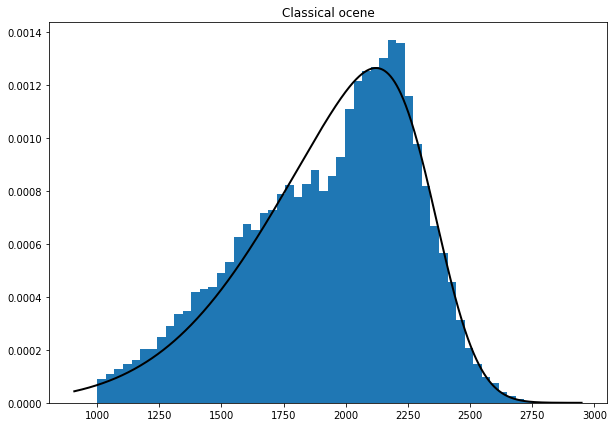

In [695]:
from scipy.stats import skewnorm

# Histogram za Classical ocene
plt.figure(figsize=(10, 7))
plt.hist(veljavni_c["Classical ocena"], bins=stevilo_razredov_c, density=True)

xmin, xmax = plt.xlim()
x = numpy.linspace(xmin, xmax, 1000)

# Graf, ki se prilega histogramu
param_c = skewnorm.fit(veljavni_c["Classical ocena"], 10, loc=2300, scale=40)
plt.plot(x, skewnorm.pdf(x, *param_c), "k", linewidth=2)

plt.title("Classical ocene")
plt.show()


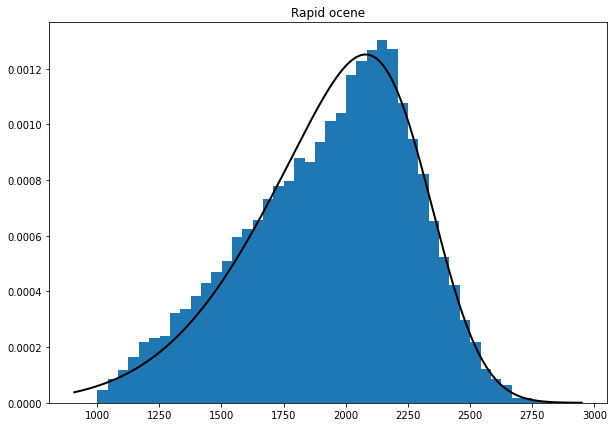

In [696]:
# Histogram za Rapid ocene
plt.figure(figsize=(10, 7))
plt.hist(veljavni_r["Rapid ocena"], bins=stevilo_razredov_r, density=True)
 
# Graf, ki se prilega histogramu
param_r = skewnorm.fit(veljavni_r["Rapid ocena"], 10, loc=2300, scale=40)
plt.plot(x, skewnorm.pdf(x, *param_r), "k", linewidth=2)

plt.title("Rapid ocene")
plt.show()


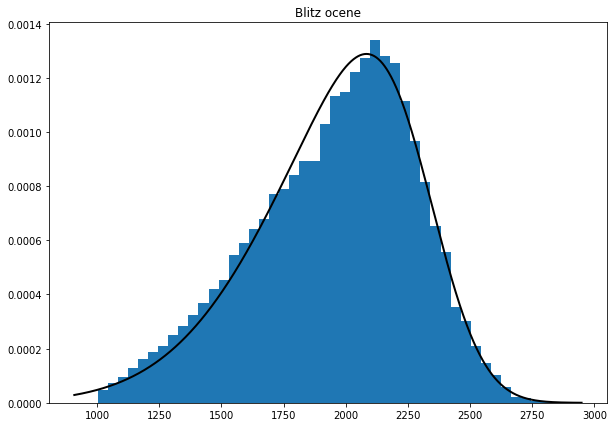

In [697]:
# Histogram za Rapid ocene
plt.figure(figsize=(10, 7))
plt.hist(veljavni_b["Blitz ocena"], bins=stevilo_razredov_b, density=True)
 
# Graf, ki se prilega histogramu
param_b = skewnorm.fit(veljavni_b["Blitz ocena"], 10, loc=2200, scale=40)
plt.plot(x, skewnorm.pdf(x, *param_b), "k", linewidth=2)

plt.title("Blitz ocene")
plt.show()

Ker so naši podatki zelo podobni normalni porazdelitvi(rahlo zamaknjena), zato bomo predpostavili, da so podatki normalno porazdeljeni in se ne bomo za veliko zmotili. Še ena smiselna prepostavka je neodvisnost. Naši podatki oz. ocene igralcev so med sabo neodvisne, razen v primeru, ko primerjamo dve različni oceni istega igralca npr. blitz in classical oceno(če ima igralec visoko classical oceno bo zelo verjetno imel tudi visoko rapid in blitz oceno), vendar pa bomo zaradi lažje analize predpostabili neodvisnost tudi v tem primeru.

Porazdelitve našiv podatkov so: $N(\mu_1, \sigma^2)$, $N(\mu_2, \sigma^2)$ in $N(\mu_3, \sigma^2)$. 
Testiramo ničelni hipotezi:
\begin{align}
H_{01} : \mu_1 = \mu_2 \quad && \quad H_{02} : \mu_2 = \mu_3
\end{align}
Proti enostranskima alternativnima hipotezama:
\begin{align}
H_{11} : \mu_1 > \mu_2 \quad && \quad H_{12} : \mu_2 > \mu_3
\end{align}

$T$-test za naši testni statistiki:
\begin{align}
T = \frac{\bar{X} - \bar{Y}}{s_p \sqrt{\frac{1}{m} + \frac{1}{n}}} \sim Student(n + m - 2)
\end{align}
Tukaj so:
* $\bar{X}$ in $\bar{Y}$ povprečji podatkov, ki ju primerjamo
* $m$, $n$ - število podatkov
* d = m + n - 2 - število prostorskih stopenj
* $s_p ^2 = \frac{n\sigma_X ^2 + m\sigma_Y ^2}{d}$, kjer sta $\sigma_X$, $\sigma_Y$ standardna odklona podatkov
* $Student(d)$ - Studentova porazdelitev z d prostorskimi stopnjami
* $\alpha$ - stopnja tveganja


In [719]:
from scipy.stats import t

X_mean = veljavni_c["Classical ocena"].mean()
Y_mean = veljavni_r["Rapid ocena"].mean()
Z_mean = veljavni_b["Blitz ocena"].mean()

m = len(veljavni_c["Classical ocena"])
n = len(veljavni_r["Rapid ocena"])
l = len(veljavni_b["Blitz ocena"])

X_std = stdev(list(veljavni_c["Classical ocena"]))
Y_std = stdev(list(veljavni_r["Rapid ocena"]))
Z_std = stdev(list(veljavni_b["Blitz ocena"]))

d1 = m + n - 2
d2 = n + l - 2

s_p1 = sqrt((m*(X_std)**2 + n*(Y_std)**2)/d1)
s_p2 = sqrt((n*(Y_std)**2 + l*(Z_std)**2)/d2)

T1 = (abs(X_mean - Y_mean))/(s_p1 * sqrt(1/m + 1/n)) 
T2 = abs((Y_mean - Z_mean))/(s_p2 * sqrt(1/n + 1/l))

alpha1 = 0.05
alpha2 = 0.01

def student(d, alpha):
    return t.ppf(1-alpha, d)

s11 = student(d1, alpha1)
s12 = student(d1, alpha2)
s21 = student(d2, alpha1)
s22 = student(d2, alpha2)

print(f"Prvi T-test ima vrednost {T1}, drugi pa {T2}")
print(f"Studentove porazdelitve za stopnji tveganj {alpha1} in {alpha2} in prostorski stopnji d1, d2: \n Student(d1, alpha1) = {s11} \n Student(d1, alpha2) = {s12} \n Student(d2, alpha1) = {s21} \n Student(d2, alpha2) = {s22}")

Prvi T-test ima vrednost (0.793272826880687+0j), drugi pa (6.002929846701361+0j)
Studentove porazdelitve za stopnji tveganj 0.05 in 0.01 in prostorski stopnji d1, d2: 
 Student(d1, alpha1) = 1.6448725011152552 
 Student(d1, alpha2) = 2.3263940645565144 
 Student(d2, alpha1) = 1.644882468698655 
 Student(d2, alpha2) = 2.326418458382215


Ker je $T_1 <$ Student $(d_1, \alpha_1)$, Student $(d_1, \alpha_2)$, lahko ničelno hipotezo $H_{01}$ sprejmemo $99%$ verjetnostjo, med tem ko ničelno hipotezo $H_{02}$ zavrnemo, saj je $T_2 >$ Student $(d_2, \alpha_1)$, Student $(d_2, \alpha_2)$ in sprejmemo alternativno hipotezo. S tem smo poakazali, da so v poprečju Classical ocene enake Rapid ocenam, med tem, ko pa so v povprečju Blitz ocene manjše od Rapid ocen in posledično Classical ocen oz. $\mu_1 = \mu_2 > \mu_3$.
Povedano drugače, ocene pri pri časovno daljšem formatu(Classical) in časovno srednje dolgem dolgem formatu(Rapid) so približno iste, do razlike pa pride pri časovno kratkem formatu(Blitz) kjer so ocene v povprečju slabše, kar je smiselno, saj je manj časa za razmišlajti in pride do več napak, kar pa je zanimovo je, da se srednji in dolgi format zelo malo razlikujeta.